<a href="https://colab.research.google.com/github/ThienNguyen3001/Object-Collision-With-Chan-Vese/blob/main/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture
!git clone https://github.com/ThienNguyen3001/Object-Collision-With-Chan-Vese.git
!rsync -av Object-Collision-With-Chan-Vese/ ./ --exclude=.git
!pip3 install requirements.txt

Number of contours: 1


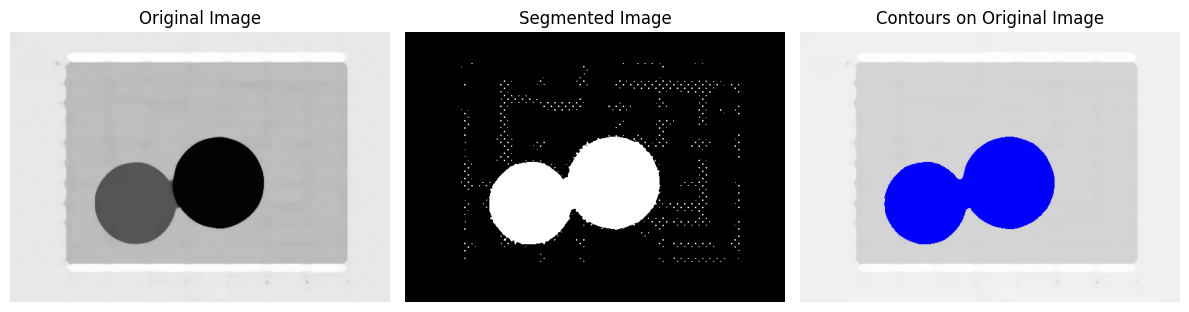

Va chạm


In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import chan_vese
from skimage.measure import label

# Load an example image
image = cv2.imread(r'/content/resources/image1.png', cv2.IMREAD_GRAYSCALE)
image = cv2.medianBlur(image, 13)
# Apply Chan-Vese segmentation
cv_result = chan_vese(image, mu=0.25, lambda1=30, lambda2=30, tol=1e-2, max_num_iter=8, extended_output=True)

# Extract the level set function
phi = cv_result[1]

# Create a binary mask where the level set function is zero (the contour)
contour_mask = phi>1

# Convert the original image to BGR
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the contour on the original image
image_bgr[contour_mask] = [0, 0, 255]  # Blue color

# Check if contours touch each other
labeled_contours, num_features = label(contour_mask, return_num=True)
print("Number of contours:", num_features)
# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(cv_result[0], cmap="gray")
ax[1].set_title("Segmented Image")

ax[2].imshow(image_bgr)
ax[2].set_title("Contours on Original Image")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Print the result
if num_features == 1:
    print("Va chạm")
else:
    print("Không va chạm")